<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**
A conceptual mathematical node that outputs the weighted sum of the inputs plus a bias, and usually passes that weighted sum through an activation function first.

- **Input Layer:**
A layer of neurons that takes in the data.

- **Hidden Layer:**
A layer of neurons in between the input and output layers.

- **Output Layer:**
A layer of neurons that spits out prediction data.

- **Activation Function:**
A function to transform a value, usually to normalize it.

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

Say you're rolling a ball down a hill. But, it doesn't go where it should. You subtract where it is from  where it should be and add that to the actual position to get it where it's supposed to be.

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

Get the dot product of the input vector and the perceptron's weight vector, pass that through an activation function, and then output the result.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [1]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model1 = Sequential([Dense(1, input_dim=2, activation='sigmoid')])

model1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

h1 = model1.fit(X, y, epochs=10)

Train on 300 samples
Epoch 1/10
300/300 [==============================] - 0s 632us/sample - loss: 0.5298 - accuracy: 0.4533
Epoch 2/10
300/300 [==============================] - 0s 47us/sample - loss: 0.5293 - accuracy: 0.4600
Epoch 3/10
300/300 [==============================] - 0s 33us/sample - loss: 0.5288 - accuracy: 0.4633
Epoch 4/10
300/300 [==============================] - 0s 36us/sample - loss: 0.5283 - accuracy: 0.4667
Epoch 5/10
300/300 [==============================] - 0s 33us/sample - loss: 0.5277 - accuracy: 0.4700
Epoch 6/10
300/300 [==============================] - 0s 37us/sample - loss: 0.5272 - accuracy: 0.4733
Epoch 7/10
300/300 [==============================] - 0s 37us/sample - loss: 0.5267 - accuracy: 0.4733
Epoch 8/10
300/300 [==============================] - 0s 40us/sample - loss: 0.5261 - accuracy: 0.4733
Epoch 9/10
300/300 [==============================] - 0s 33us/sample - loss: 0.5256 - accuracy: 0.4733
Epoch 10/10
300/300 [==============================

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. 

In [3]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, model, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [4]:
stop = EarlyStopping(monitor='accuracy', min_delta=0.001, patience=3)

model2 = Sequential([
    Dense(2, input_dim=2, activation='relu'),  # input
    Dense(32, activation='relu'),  # hidden
    Dense(10, activation='relu'),  # hidden
    Dense(1, activation='sigmoid')
])

model2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

h2 = model2.fit(X, y, epochs=50, callbacks=[stop])

Train on 300 samples
Epoch 1/50
300/300 [==============================] - 0s 765us/sample - loss: 0.4994 - accuracy: 0.4833
Epoch 2/50
300/300 [==============================] - 0s 53us/sample - loss: 0.4930 - accuracy: 0.6000
Epoch 3/50
300/300 [==============================] - 0s 43us/sample - loss: 0.4862 - accuracy: 0.6233
Epoch 4/50
300/300 [==============================] - 0s 36us/sample - loss: 0.4792 - accuracy: 0.6267
Epoch 5/50
300/300 [==============================] - 0s 43us/sample - loss: 0.4731 - accuracy: 0.6300
Epoch 6/50
300/300 [==============================] - 0s 47us/sample - loss: 0.4663 - accuracy: 0.6333
Epoch 7/50
300/300 [==============================] - 0s 43us/sample - loss: 0.4604 - accuracy: 0.6333
Epoch 8/50
300/300 [==============================] - 0s 47us/sample - loss: 0.4536 - accuracy: 0.6533
Epoch 9/50
300/300 [==============================] - 0s 40us/sample - loss: 0.4463 - accuracy: 0.6533
Epoch 10/50
300/300 [==============================

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

c:\users\thepi\.virtualenvs\ds-unit-4-sprint-2-neural-networks-3fz2g-xz\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


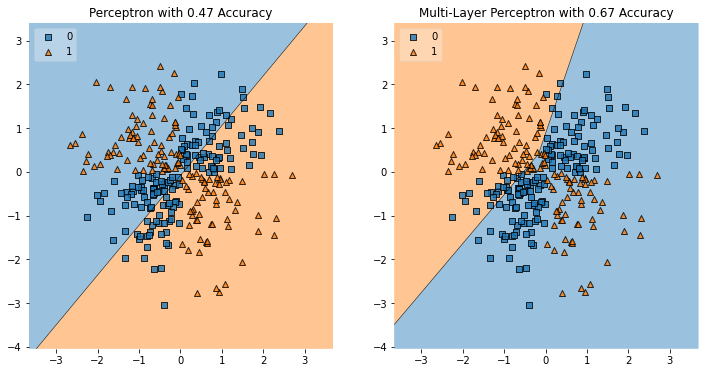

In [5]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):
    
    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

XOR is inherently non-linear. It is because of this that a single perceptron, which by itself can only predict linear functions, cannot accurately predict the outcomes. 

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0


In [7]:
target = 'target'

X = df.drop(target, axis=1).values
y = df[['target']].values

X

array([[52.,  1.,  2., ...,  2.,  4.,  2.],
       [62.,  0.,  0., ...,  2.,  0.,  2.],
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       ...,
       [35.,  0.,  0., ...,  2.,  0.,  2.],
       [39.,  0.,  2., ...,  1.,  0.,  2.],
       [64.,  1.,  0., ...,  0.,  1.,  2.]])

In [8]:
y

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [9]:
len(X[0])

13

In [10]:
model3 = Sequential([
    Flatten(),
    Dense(13, input_dim=13, activation='relu'),
    Dense(30, activation='relu'),
    Dense(25, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model3.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

h3 = model3.fit(X, y)

Train on 303 samples
303/303 [==============================] - 0s 923us/sample - loss: 0.4554 - accuracy: 0.5446


In [11]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

stop = EarlyStopping(monitor='loss', min_delta=.01)
    
def create_model(loss='mean_absolute_error', optimizer='adam'):
    print(f'Loss: {loss}; optimimer: {optimizer}')
    model = Sequential([
        Dense(13, input_dim=13, activation='relu'),
        Dense(30, activation='relu'),
        Dense(25, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid'),
    ])
    
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    
    return model

model = KerasClassifier(build_fn=create_model, verbose=1)

param_grid = {'loss': [
                    'binary_crossentropy',
                    'mean_absolute_error',
                    'mean_squared_error'
                      ],
              'optimizer': ['adam', 'nadam', 'sgd', 'adadelta', 'adagrad'],
              'epochs':[50, 100, 150, 200]
              }

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y, callbacks=[stop])

Loss: binary_crossentropy; optimimer: adam
Train on 242 samples
Epoch 1/50
242/242 [==============================] - 0s 2ms/sample - loss: 1.4480 - accuracy: 0.4876
Epoch 2/50
242/242 [==============================] - 0s 41us/sample - loss: 0.9073 - accuracy: 0.5413
Epoch 3/50
242/242 [==============================] - 0s 37us/sample - loss: 0.7030 - accuracy: 0.5372
Epoch 4/50
61/61 [==============================] - 0s 1ms/sample - loss: 0.6844 - accuracy: 0.5246
Loss: binary_crossentropy; optimimer: adam
Train on 242 samples
Epoch 1/50
242/242 [==============================] - 0s 1ms/sample - loss: 35.7778 - accuracy: 0.4752
Epoch 2/50
242/242 [==============================] - 0s 33us/sample - loss: 18.7476 - accuracy: 0.4752
Epoch 3/50
242/242 [==============================] - 0s 37us/sample - loss: 6.3173 - accuracy: 0.4752
Epoch 4/50
242/242 [==============================] - 0s 33us/sample - loss: 1.8214 - accuracy: 0.5372
Epoch 5/50
242/242 [==============================]

243/243 [==============================] - 0s 53us/sample - loss: 0.7325 - accuracy: 0.6173
Epoch 3/50
243/243 [==============================] - 0s 49us/sample - loss: 0.6895 - accuracy: 0.6049
Epoch 4/50
243/243 [==============================] - 0s 41us/sample - loss: 0.6718 - accuracy: 0.6008
Epoch 5/50
243/243 [==============================] - 0s 45us/sample - loss: 0.6423 - accuracy: 0.6420
Epoch 6/50
243/243 [==============================] - 0s 45us/sample - loss: 0.6274 - accuracy: 0.6296
Epoch 7/50
60/60 [==============================] - 0s 3ms/sample - loss: 0.5105 - accuracy: 0.7667
Loss: binary_crossentropy; optimimer: sgd
Train on 242 samples
Epoch 1/50
242/242 [==============================] - 0s 1ms/sample - loss: 2.3564 - accuracy: 0.5165
Epoch 2/50
242/242 [==============================] - 0s 45us/sample - loss: 0.6923 - accuracy: 0.5496
Epoch 3/50
61/61 [==============================] - 0s 1ms/sample - loss: 0.6926 - accuracy: 0.5246
Loss: binary_crossentropy; o

242/242 [==============================] - 0s 37us/sample - loss: 2.3873 - accuracy: 0.5413
Epoch 49/50
242/242 [==============================] - 0s 37us/sample - loss: 2.3758 - accuracy: 0.5413
Epoch 50/50
61/61 [==============================] - 0s 1ms/sample - loss: 2.3696 - accuracy: 0.5246
Loss: binary_crossentropy; optimimer: adadelta
Train on 242 samples
Epoch 1/50
242/242 [==============================] - 0s 1ms/sample - loss: 3.7732 - accuracy: 0.4752
Epoch 2/50
242/242 [==============================] - 0s 37us/sample - loss: 3.7568 - accuracy: 0.4752
Epoch 3/50
242/242 [==============================] - 0s 41us/sample - loss: 3.7402 - accuracy: 0.4752
Epoch 4/50
242/242 [==============================] - 0s 37us/sample - loss: 3.7238 - accuracy: 0.4752
Epoch 5/50
242/242 [==============================] - 0s 37us/sample - loss: 3.7071 - accuracy: 0.4752
Epoch 6/50
242/242 [==============================] - 0s 37us/sample - loss: 3.6902 - accuracy: 0.4752
Epoch 7/50
242/242

242/242 [==============================] - 0s 41us/sample - loss: 28.9813 - accuracy: 0.5620
Epoch 24/50
242/242 [==============================] - 0s 49us/sample - loss: 28.9527 - accuracy: 0.5620
Epoch 25/50
242/242 [==============================] - 0s 45us/sample - loss: 28.9236 - accuracy: 0.5620
Epoch 26/50
242/242 [==============================] - 0s 37us/sample - loss: 28.8940 - accuracy: 0.5620
Epoch 27/50
242/242 [==============================] - 0s 41us/sample - loss: 28.8647 - accuracy: 0.5620
Epoch 28/50
242/242 [==============================] - 0s 45us/sample - loss: 28.8353 - accuracy: 0.5620
Epoch 29/50
242/242 [==============================] - 0s 41us/sample - loss: 28.8061 - accuracy: 0.5620
Epoch 30/50
242/242 [==============================] - 0s 45us/sample - loss: 28.7762 - accuracy: 0.5620
Epoch 31/50
242/242 [==============================] - 0s 45us/sample - loss: 28.7463 - accuracy: 0.5620
Epoch 32/50
242/242 [==============================] - 0s 45us/samp

243/243 [==============================] - 0s 45us/sample - loss: 19.1989 - accuracy: 0.4403
Epoch 50/50
60/60 [==============================] - 0s 1ms/sample - loss: 18.3086 - accuracy: 0.5167
Loss: binary_crossentropy; optimimer: adadelta
Train on 243 samples
Epoch 1/50
243/243 [==============================] - 0s 2ms/sample - loss: 2.3492 - accuracy: 0.5597
Epoch 2/50
60/60 [==============================] - 0s 1ms/sample - loss: 2.1236 - accuracy: 0.5333
Loss: binary_crossentropy; optimimer: adagrad
Train on 242 samples
Epoch 1/50
242/242 [==============================] - 0s 1ms/sample - loss: 0.8251 - accuracy: 0.6157
Epoch 2/50
242/242 [==============================] - 0s 37us/sample - loss: 0.6623 - accuracy: 0.6818
Epoch 3/50
242/242 [==============================] - 0s 49us/sample - loss: 0.6315 - accuracy: 0.6488
Epoch 4/50
242/242 [==============================] - 0s 37us/sample - loss: 0.6086 - accuracy: 0.6942
Epoch 5/50
61/61 [==============================] - 0s 1m

243/243 [==============================] - 0s 1ms/sample - loss: 0.4217 - accuracy: 0.5885
Epoch 2/50
243/243 [==============================] - 0s 41us/sample - loss: 0.3902 - accuracy: 0.6091
Epoch 3/50
243/243 [==============================] - 0s 41us/sample - loss: 0.3775 - accuracy: 0.6214
Epoch 4/50
243/243 [==============================] - 0s 41us/sample - loss: 0.3588 - accuracy: 0.6708
Epoch 5/50
60/60 [==============================] - 0s 989us/sample - loss: 0.2775 - accuracy: 0.7500
Loss: mean_absolute_error; optimimer: nadam
Train on 242 samples
Epoch 1/50
242/242 [==============================] - 1s 2ms/sample - loss: 0.4504 - accuracy: 0.5496
Epoch 2/50
61/61 [==============================] - 0s 931us/sample - loss: 0.4754 - accuracy: 0.5246
Loss: mean_absolute_error; optimimer: nadam
Train on 242 samples
Epoch 1/50
242/242 [==============================] - 1s 2ms/sample - loss: 0.4752 - accuracy: 0.5248
Epoch 2/50
61/61 [==============================] - 0s 891us/s

243/243 [==============================] - 0s 944us/sample - loss: 0.5267 - accuracy: 0.4733
Epoch 2/50
60/60 [==============================] - 0s 1ms/sample - loss: 0.6167 - accuracy: 0.3833
Loss: mean_squared_error; optimimer: adam
Train on 242 samples
Epoch 1/50
242/242 [==============================] - 0s 1ms/sample - loss: 0.4512 - accuracy: 0.5000
Epoch 2/50
242/242 [==============================] - 0s 41us/sample - loss: 0.4202 - accuracy: 0.4835
Epoch 3/50
242/242 [==============================] - 0s 41us/sample - loss: 0.3803 - accuracy: 0.5124
Epoch 4/50
242/242 [==============================] - 0s 41us/sample - loss: 0.3502 - accuracy: 0.5248
Epoch 5/50
242/242 [==============================] - 0s 41us/sample - loss: 0.2899 - accuracy: 0.5950
Epoch 6/50
242/242 [==============================] - 0s 41us/sample - loss: 0.2556 - accuracy: 0.6364
Epoch 7/50
242/242 [==============================] - 0s 41us/sample - loss: 0.2408 - accuracy: 0.6240
Epoch 8/50
61/61 [======

61/61 [==============================] - 0s 1ms/sample - loss: 0.3770 - accuracy: 0.6230
Loss: mean_squared_error; optimimer: adadelta
Train on 242 samples
Epoch 1/50
242/242 [==============================] - 0s 1ms/sample - loss: 0.4612 - accuracy: 0.4835
Epoch 2/50
61/61 [==============================] - 0s 2ms/sample - loss: 0.4505 - accuracy: 0.4918
Loss: mean_squared_error; optimimer: adadelta
Train on 243 samples
Epoch 1/50
243/243 [==============================] - 0s 1ms/sample - loss: 0.5593 - accuracy: 0.4403
Epoch 2/50
60/60 [==============================] - 0s 1ms/sample - loss: 0.4831 - accuracy: 0.5167
Loss: mean_squared_error; optimimer: adadelta
Train on 243 samples
Epoch 1/50
243/243 [==============================] - 0s 1ms/sample - loss: 0.5267 - accuracy: 0.4733
Epoch 2/50
60/60 [==============================] - 0s 2ms/sample - loss: 0.6167 - accuracy: 0.3833
Loss: mean_squared_error; optimimer: adagrad
Train on 242 samples
Epoch 1/50
242/242 [==================

242/242 [==============================] - 0s 49us/sample - loss: 0.9986 - accuracy: 0.4793
Epoch 3/100
242/242 [==============================] - 0s 37us/sample - loss: 0.7071 - accuracy: 0.5909
Epoch 4/100
242/242 [==============================] - 0s 66us/sample - loss: 0.6798 - accuracy: 0.6364
Epoch 5/100
61/61 [==============================] - 0s 2ms/sample - loss: 0.6025 - accuracy: 0.6066
Loss: binary_crossentropy; optimimer: nadam
Train on 242 samples
Epoch 1/100
242/242 [==============================] - 1s 3ms/sample - loss: 5.9117 - accuracy: 0.5785
Epoch 2/100
242/242 [==============================] - 0s 41us/sample - loss: 0.6758 - accuracy: 0.6818
Epoch 3/100
242/242 [==============================] - 0s 41us/sample - loss: 0.6190 - accuracy: 0.7107
Epoch 4/100
242/242 [==============================] - 0s 49us/sample - loss: 0.5967 - accuracy: 0.7149
Epoch 5/100
61/61 [==============================] - 0s 1ms/sample - loss: 0.9247 - accuracy: 0.5246
Loss: binary_cross

242/242 [==============================] - 0s 37us/sample - loss: 5.2250 - accuracy: 0.4504
Epoch 27/100
242/242 [==============================] - 0s 37us/sample - loss: 5.2081 - accuracy: 0.4504
Epoch 28/100
242/242 [==============================] - 0s 37us/sample - loss: 5.1910 - accuracy: 0.4504
Epoch 29/100
242/242 [==============================] - 0s 33us/sample - loss: 5.1739 - accuracy: 0.4504
Epoch 30/100
242/242 [==============================] - 0s 41us/sample - loss: 5.1567 - accuracy: 0.4504
Epoch 31/100
242/242 [==============================] - 0s 33us/sample - loss: 5.1394 - accuracy: 0.4504
Epoch 32/100
242/242 [==============================] - 0s 45us/sample - loss: 5.1221 - accuracy: 0.4504
Epoch 33/100
242/242 [==============================] - 0s 37us/sample - loss: 5.1049 - accuracy: 0.4504
Epoch 34/100
242/242 [==============================] - 0s 37us/sample - loss: 5.0876 - accuracy: 0.4504
Epoch 35/100
242/242 [==============================] - 0s 37us/samp

242/242 [==============================] - 0s 49us/sample - loss: 16.6747 - accuracy: 0.4752
Epoch 3/100
242/242 [==============================] - 0s 41us/sample - loss: 16.6284 - accuracy: 0.4752
Epoch 4/100
242/242 [==============================] - 0s 54us/sample - loss: 16.5813 - accuracy: 0.4752
Epoch 5/100
242/242 [==============================] - 0s 37us/sample - loss: 16.5340 - accuracy: 0.4752
Epoch 6/100
242/242 [==============================] - 0s 49us/sample - loss: 16.4867 - accuracy: 0.4752
Epoch 7/100
242/242 [==============================] - 0s 49us/sample - loss: 16.4386 - accuracy: 0.4752
Epoch 8/100
242/242 [==============================] - 0s 56us/sample - loss: 16.3896 - accuracy: 0.4752
Epoch 9/100
242/242 [==============================] - 0s 41us/sample - loss: 16.3405 - accuracy: 0.4752
Epoch 10/100
242/242 [==============================] - 0s 41us/sample - loss: 16.2917 - accuracy: 0.4752
Epoch 11/100
242/242 [==============================] - 0s 45us/sa

242/242 [==============================] - 0s 54us/sample - loss: 12.2918 - accuracy: 0.4752
Epoch 80/100
242/242 [==============================] - 0s 49us/sample - loss: 12.2290 - accuracy: 0.4752
Epoch 81/100
242/242 [==============================] - 0s 41us/sample - loss: 12.1644 - accuracy: 0.4752
Epoch 82/100
242/242 [==============================] - 0s 62us/sample - loss: 12.1008 - accuracy: 0.4752
Epoch 83/100
242/242 [==============================] - 0s 62us/sample - loss: 12.0369 - accuracy: 0.4752
Epoch 84/100
242/242 [==============================] - 0s 49us/sample - loss: 11.9732 - accuracy: 0.4752
Epoch 85/100
242/242 [==============================] - ETA: 0s - loss: 12.0777 - accuracy: 0.468 - 0s 45us/sample - loss: 11.9083 - accuracy: 0.4752
Epoch 86/100
242/242 [==============================] - 0s 49us/sample - loss: 11.8437 - accuracy: 0.4752
Epoch 87/100
242/242 [==============================] - 0s 49us/sample - loss: 11.7781 - accuracy: 0.4752
Epoch 88/100
24

243/243 [==============================] - 0s 45us/sample - loss: 4.2967 - accuracy: 0.4733
Epoch 49/100
243/243 [==============================] - 0s 37us/sample - loss: 4.2808 - accuracy: 0.4733
Epoch 50/100
243/243 [==============================] - 0s 45us/sample - loss: 4.2646 - accuracy: 0.4733
Epoch 51/100
243/243 [==============================] - 0s 41us/sample - loss: 4.2485 - accuracy: 0.4733
Epoch 52/100
243/243 [==============================] - 0s 37us/sample - loss: 4.2326 - accuracy: 0.4733
Epoch 53/100
243/243 [==============================] - 0s 37us/sample - loss: 4.2165 - accuracy: 0.4733
Epoch 54/100
243/243 [==============================] - 0s 45us/sample - loss: 4.2002 - accuracy: 0.4733
Epoch 55/100
243/243 [==============================] - 0s 37us/sample - loss: 4.1840 - accuracy: 0.4733
Epoch 56/100
243/243 [==============================] - 0s 37us/sample - loss: 4.1677 - accuracy: 0.4733
Epoch 57/100
243/243 [==============================] - 0s 41us/samp

242/242 [==============================] - 0s 62us/sample - loss: 0.7425 - accuracy: 0.5248
Epoch 6/100
242/242 [==============================] - 0s 70us/sample - loss: 0.7317 - accuracy: 0.5289
Epoch 7/100
61/61 [==============================] - 0s 1ms/sample - loss: 0.7187 - accuracy: 0.6066
Loss: binary_crossentropy; optimimer: adagrad
Train on 242 samples
Epoch 1/100
242/242 [==============================] - 0s 1ms/sample - loss: 5.1047 - accuracy: 0.4380
Epoch 2/100
242/242 [==============================] - 0s 58us/sample - loss: 2.4258 - accuracy: 0.4380
Epoch 3/100
242/242 [==============================] - 0s 54us/sample - loss: 1.2601 - accuracy: 0.4959
Epoch 4/100
242/242 [==============================] - 0s 49us/sample - loss: 0.8065 - accuracy: 0.6405
Epoch 5/100
242/242 [==============================] - 0s 58us/sample - loss: 0.6767 - accuracy: 0.7314
Epoch 6/100
242/242 [==============================] - 0s 37us/sample - loss: 0.6400 - accuracy: 0.7273
Epoch 7/100
2

60/60 [==============================] - 0s 981us/sample - loss: 0.4205 - accuracy: 0.6167
Loss: mean_absolute_error; optimimer: nadam
Train on 243 samples
Epoch 1/100
243/243 [==============================] - 1s 3ms/sample - loss: 0.4626 - accuracy: 0.5432
Epoch 2/100
243/243 [==============================] - 0s 41us/sample - loss: 0.3878 - accuracy: 0.6255
Epoch 3/100
60/60 [==============================] - 0s 931us/sample - loss: 0.3342 - accuracy: 0.7167
Loss: mean_absolute_error; optimimer: sgd
Train on 242 samples
Epoch 1/100
242/242 [==============================] - 0s 856us/sample - loss: 0.5100 - accuracy: 0.4917
Epoch 2/100
242/242 [==============================] - 0s 37us/sample - loss: 0.4097 - accuracy: 0.5909
Epoch 3/100
61/61 [==============================] - 0s 916us/sample - loss: 0.4233 - accuracy: 0.5738
Loss: mean_absolute_error; optimimer: sgd
Train on 242 samples
Epoch 1/100
242/242 [==============================] - 0s 898us/sample - loss: 0.4752 - accuracy

61/61 [==============================] - 0s 956us/sample - loss: 0.5246 - accuracy: 0.4754
Loss: mean_squared_error; optimimer: adam
Train on 243 samples
Epoch 1/100
243/243 [==============================] - 0s 1ms/sample - loss: 0.2920 - accuracy: 0.5720
Epoch 2/100
243/243 [==============================] - 0s 37us/sample - loss: 0.2364 - accuracy: 0.6379
Epoch 3/100
243/243 [==============================] - 0s 45us/sample - loss: 0.2153 - accuracy: 0.6626
Epoch 4/100
60/60 [==============================] - 0s 964us/sample - loss: 0.2753 - accuracy: 0.6500
Loss: mean_squared_error; optimimer: adam
Train on 243 samples
Epoch 1/100
243/243 [==============================] - 0s 1ms/sample - loss: 0.3372 - accuracy: 0.5473
Epoch 2/100
243/243 [==============================] - 0s 37us/sample - loss: 0.2479 - accuracy: 0.6337
Epoch 3/100
243/243 [==============================] - 0s 37us/sample - loss: 0.2378 - accuracy: 0.6173
Epoch 4/100
243/243 [==============================] - 0s 

243/243 [==============================] - 0s 989us/sample - loss: 0.5267 - accuracy: 0.4733
Epoch 2/100
60/60 [==============================] - 0s 947us/sample - loss: 0.6167 - accuracy: 0.3833
Loss: mean_squared_error; optimimer: adagrad
Train on 242 samples
Epoch 1/100
242/242 [==============================] - 0s 940us/sample - loss: 0.5060 - accuracy: 0.4050
Epoch 2/100
242/242 [==============================] - 0s 33us/sample - loss: 0.3105 - accuracy: 0.5124
Epoch 3/100
242/242 [==============================] - 0s 33us/sample - loss: 0.2625 - accuracy: 0.5744
Epoch 4/100
61/61 [==============================] - 0s 892us/sample - loss: 0.2464 - accuracy: 0.5902
Loss: mean_squared_error; optimimer: adagrad
Train on 242 samples
Epoch 1/100
242/242 [==============================] - 0s 954us/sample - loss: 0.4752 - accuracy: 0.5248
Epoch 2/100
61/61 [==============================] - 0s 924us/sample - loss: 0.3770 - accuracy: 0.6230
Loss: mean_squared_error; optimimer: adagrad
Tra

242/242 [==============================] - 1s 3ms/sample - loss: 1.6067 - accuracy: 0.4711
Epoch 2/150
242/242 [==============================] - 0s 41us/sample - loss: 0.9744 - accuracy: 0.4628
Epoch 3/150
242/242 [==============================] - 0s 37us/sample - loss: 0.8032 - accuracy: 0.4669
Epoch 4/150
242/242 [==============================] - 0s 41us/sample - loss: 0.7201 - accuracy: 0.5083
Epoch 5/150
242/242 [==============================] - 0s 41us/sample - loss: 0.6826 - accuracy: 0.5702
Epoch 6/150
242/242 [==============================] - 0s 41us/sample - loss: 0.6581 - accuracy: 0.6033
Epoch 7/150
242/242 [==============================] - 0s 41us/sample - loss: 0.6356 - accuracy: 0.6694
Epoch 8/150
242/242 [==============================] - 0s 37us/sample - loss: 0.6255 - accuracy: 0.6694
Epoch 9/150
242/242 [==============================] - 0s 41us/sample - loss: 0.6154 - accuracy: 0.6901
Epoch 10/150
61/61 [==============================] - 0s 1ms/sample - loss: 0

242/242 [==============================] - 0s 37us/sample - loss: 7.9963 - accuracy: 0.4752
Epoch 18/150
242/242 [==============================] - 0s 41us/sample - loss: 7.9667 - accuracy: 0.4752
Epoch 19/150
242/242 [==============================] - 0s 37us/sample - loss: 7.9369 - accuracy: 0.4752
Epoch 20/150
242/242 [==============================] - 0s 37us/sample - loss: 7.9067 - accuracy: 0.4752
Epoch 21/150
242/242 [==============================] - 0s 37us/sample - loss: 7.8763 - accuracy: 0.4752
Epoch 22/150
242/242 [==============================] - 0s 37us/sample - loss: 7.8454 - accuracy: 0.4752
Epoch 23/150
242/242 [==============================] - 0s 37us/sample - loss: 7.8152 - accuracy: 0.4752
Epoch 24/150
242/242 [==============================] - 0s 37us/sample - loss: 7.7850 - accuracy: 0.4752
Epoch 25/150
242/242 [==============================] - 0s 45us/sample - loss: 7.7532 - accuracy: 0.4752
Epoch 26/150
242/242 [==============================] - 0s 37us/samp

242/242 [==============================] - 0s 41us/sample - loss: 5.1274 - accuracy: 0.4628
Epoch 96/150
242/242 [==============================] - 0s 37us/sample - loss: 5.0863 - accuracy: 0.4628
Epoch 97/150
242/242 [==============================] - 0s 37us/sample - loss: 5.0455 - accuracy: 0.4628
Epoch 98/150
242/242 [==============================] - 0s 37us/sample - loss: 5.0045 - accuracy: 0.4628
Epoch 99/150
242/242 [==============================] - 0s 37us/sample - loss: 4.9642 - accuracy: 0.4628
Epoch 100/150
242/242 [==============================] - 0s 41us/sample - loss: 4.9240 - accuracy: 0.4587
Epoch 101/150
242/242 [==============================] - 0s 37us/sample - loss: 4.8840 - accuracy: 0.4587
Epoch 102/150
242/242 [==============================] - 0s 41us/sample - loss: 4.8445 - accuracy: 0.4545
Epoch 103/150
242/242 [==============================] - 0s 37us/sample - loss: 4.8048 - accuracy: 0.4545
Epoch 104/150
242/242 [==============================] - 0s 37us

242/242 [==============================] - 0s 37us/sample - loss: 11.4830 - accuracy: 0.5620
Epoch 22/150
242/242 [==============================] - 0s 41us/sample - loss: 11.4562 - accuracy: 0.5620
Epoch 23/150
242/242 [==============================] - 0s 37us/sample - loss: 11.4295 - accuracy: 0.5620
Epoch 24/150
242/242 [==============================] - 0s 33us/sample - loss: 11.4023 - accuracy: 0.5620
Epoch 25/150
242/242 [==============================] - 0s 37us/sample - loss: 11.3753 - accuracy: 0.5620
Epoch 26/150
242/242 [==============================] - 0s 41us/sample - loss: 11.3484 - accuracy: 0.5620
Epoch 27/150
242/242 [==============================] - 0s 37us/sample - loss: 11.3210 - accuracy: 0.5620
Epoch 28/150
242/242 [==============================] - 0s 37us/sample - loss: 11.2940 - accuracy: 0.5620
Epoch 29/150
242/242 [==============================] - 0s 37us/sample - loss: 11.2654 - accuracy: 0.5620
Epoch 30/150
242/242 [==============================] - 0s 

242/242 [==============================] - 0s 41us/sample - loss: 8.7887 - accuracy: 0.5620
Epoch 99/150
242/242 [==============================] - 0s 37us/sample - loss: 8.7478 - accuracy: 0.5620
Epoch 100/150
242/242 [==============================] - 0s 37us/sample - loss: 8.7068 - accuracy: 0.5620
Epoch 101/150
242/242 [==============================] - 0s 40us/sample - loss: 8.6661 - accuracy: 0.5620
Epoch 102/150
242/242 [==============================] - 0s 41us/sample - loss: 8.6246 - accuracy: 0.5620
Epoch 103/150
242/242 [==============================] - 0s 41us/sample - loss: 8.5836 - accuracy: 0.5620
Epoch 104/150
242/242 [==============================] - 0s 41us/sample - loss: 8.5417 - accuracy: 0.5620
Epoch 105/150
242/242 [==============================] - 0s 41us/sample - loss: 8.4998 - accuracy: 0.5620
Epoch 106/150
242/242 [==============================] - 0s 41us/sample - loss: 8.4591 - accuracy: 0.5620
Epoch 107/150
242/242 [==============================] - 0s 4

243/243 [==============================] - 0s 37us/sample - loss: 16.9054 - accuracy: 0.5597
Epoch 25/150
243/243 [==============================] - 0s 41us/sample - loss: 16.8667 - accuracy: 0.5597
Epoch 26/150
243/243 [==============================] - 0s 41us/sample - loss: 16.8277 - accuracy: 0.5597
Epoch 27/150
243/243 [==============================] - 0s 41us/sample - loss: 16.7892 - accuracy: 0.5597
Epoch 28/150
243/243 [==============================] - 0s 41us/sample - loss: 16.7502 - accuracy: 0.5597
Epoch 29/150
243/243 [==============================] - 0s 37us/sample - loss: 16.7108 - accuracy: 0.5597
Epoch 30/150
243/243 [==============================] - 0s 37us/sample - loss: 16.6721 - accuracy: 0.5597
Epoch 31/150
243/243 [==============================] - 0s 40us/sample - loss: 16.6324 - accuracy: 0.5597
Epoch 32/150
243/243 [==============================] - 0s 41us/sample - loss: 16.5930 - accuracy: 0.5597
Epoch 33/150
243/243 [==============================] - 0s 

243/243 [==============================] - 0s 49us/sample - loss: 13.5827 - accuracy: 0.5597
Epoch 102/150
243/243 [==============================] - 0s 37us/sample - loss: 13.5351 - accuracy: 0.5597
Epoch 103/150
243/243 [==============================] - 0s 41us/sample - loss: 13.4884 - accuracy: 0.5597
Epoch 104/150
243/243 [==============================] - 0s 45us/sample - loss: 13.4402 - accuracy: 0.5597
Epoch 105/150
243/243 [==============================] - 0s 37us/sample - loss: 13.3924 - accuracy: 0.5597
Epoch 106/150
243/243 [==============================] - 0s 37us/sample - loss: 13.3454 - accuracy: 0.5597
Epoch 107/150
243/243 [==============================] - 0s 37us/sample - loss: 13.2983 - accuracy: 0.5597
Epoch 108/150
243/243 [==============================] - 0s 37us/sample - loss: 13.2512 - accuracy: 0.5597
Epoch 109/150
243/243 [==============================] - 0s 45us/sample - loss: 13.2043 - accuracy: 0.5597
Epoch 110/150
243/243 [============================

243/243 [==============================] - 0s 37us/sample - loss: 5.4436 - accuracy: 0.5267
Epoch 27/150
243/243 [==============================] - 0s 41us/sample - loss: 5.4216 - accuracy: 0.5267
Epoch 28/150
243/243 [==============================] - 0s 49us/sample - loss: 5.3998 - accuracy: 0.5267
Epoch 29/150
243/243 [==============================] - 0s 41us/sample - loss: 5.3776 - accuracy: 0.5267
Epoch 30/150
243/243 [==============================] - 0s 37us/sample - loss: 5.3558 - accuracy: 0.5267
Epoch 31/150
243/243 [==============================] - 0s 41us/sample - loss: 5.3333 - accuracy: 0.5267
Epoch 32/150
243/243 [==============================] - 0s 37us/sample - loss: 5.3104 - accuracy: 0.5267
Epoch 33/150
243/243 [==============================] - 0s 37us/sample - loss: 5.2877 - accuracy: 0.5267
Epoch 34/150
243/243 [==============================] - 0s 41us/sample - loss: 5.2653 - accuracy: 0.5267
Epoch 35/150
243/243 [==============================] - 0s 37us/samp

243/243 [==============================] - 0s 41us/sample - loss: 3.5085 - accuracy: 0.5267
Epoch 105/150
243/243 [==============================] - 0s 37us/sample - loss: 3.4816 - accuracy: 0.5267
Epoch 106/150
243/243 [==============================] - 0s 37us/sample - loss: 3.4542 - accuracy: 0.5267
Epoch 107/150
243/243 [==============================] - 0s 41us/sample - loss: 3.4273 - accuracy: 0.5267
Epoch 108/150
243/243 [==============================] - 0s 41us/sample - loss: 3.3997 - accuracy: 0.5267
Epoch 109/150
243/243 [==============================] - 0s 41us/sample - loss: 3.3725 - accuracy: 0.5267
Epoch 110/150
243/243 [==============================] - 0s 41us/sample - loss: 3.3453 - accuracy: 0.5267
Epoch 111/150
243/243 [==============================] - 0s 37us/sample - loss: 3.3180 - accuracy: 0.5267
Epoch 112/150
243/243 [==============================] - 0s 41us/sample - loss: 3.2901 - accuracy: 0.5267
Epoch 113/150
243/243 [==============================] - 0s 

243/243 [==============================] - 0s 37us/sample - loss: 10.0546 - accuracy: 0.5597
Epoch 4/150
243/243 [==============================] - 0s 37us/sample - loss: 7.1094 - accuracy: 0.5597
Epoch 5/150
243/243 [==============================] - 0s 37us/sample - loss: 4.6113 - accuracy: 0.5597
Epoch 6/150
243/243 [==============================] - 0s 37us/sample - loss: 2.7681 - accuracy: 0.5350
Epoch 7/150
243/243 [==============================] - 0s 33us/sample - loss: 2.1207 - accuracy: 0.4198
Epoch 8/150
243/243 [==============================] - 0s 41us/sample - loss: 1.9178 - accuracy: 0.4074
Epoch 9/150
243/243 [==============================] - 0s 37us/sample - loss: 1.7753 - accuracy: 0.4156
Epoch 10/150
243/243 [==============================] - 0s 36us/sample - loss: 1.6549 - accuracy: 0.4156
Epoch 11/150
243/243 [==============================] - 0s 37us/sample - loss: 1.5513 - accuracy: 0.4156
Epoch 12/150
243/243 [==============================] - 0s 37us/sample - 

Train on 242 samples
Epoch 1/150
242/242 [==============================] - 1s 2ms/sample - loss: 0.5248 - accuracy: 0.4752
Epoch 2/150
61/61 [==============================] - 0s 948us/sample - loss: 0.6230 - accuracy: 0.3770
Loss: mean_absolute_error; optimimer: nadam
Train on 242 samples
Epoch 1/150
242/242 [==============================] - 1s 2ms/sample - loss: 0.5614 - accuracy: 0.4380
Epoch 2/150
242/242 [==============================] - 0s 45us/sample - loss: 0.3958 - accuracy: 0.6033
Epoch 3/150
242/242 [==============================] - 0s 37us/sample - loss: 0.3664 - accuracy: 0.6322
Epoch 4/150
242/242 [==============================] - 0s 41us/sample - loss: 0.3334 - accuracy: 0.6653
Epoch 5/150
61/61 [==============================] - 0s 932us/sample - loss: 0.4895 - accuracy: 0.5082
Loss: mean_absolute_error; optimimer: nadam
Train on 243 samples
Epoch 1/150
243/243 [==============================] - 1s 2ms/sample - loss: 0.5596 - accuracy: 0.4280
Epoch 2/150
243/243 [=

Epoch 2/150
61/61 [==============================] - 0s 932us/sample - loss: 0.4754 - accuracy: 0.5246
Loss: mean_squared_error; optimimer: adam
Train on 242 samples
Epoch 1/150
242/242 [==============================] - 0s 1ms/sample - loss: 0.5248 - accuracy: 0.4752
Epoch 2/150
61/61 [==============================] - 0s 981us/sample - loss: 0.6230 - accuracy: 0.3770
Loss: mean_squared_error; optimimer: adam
Train on 242 samples
Epoch 1/150
242/242 [==============================] - 0s 1ms/sample - loss: 0.5433 - accuracy: 0.4545
Epoch 2/150
242/242 [==============================] - 0s 41us/sample - loss: 0.4340 - accuracy: 0.5000
Epoch 3/150
61/61 [==============================] - 0s 932us/sample - loss: 0.5151 - accuracy: 0.4754
Loss: mean_squared_error; optimimer: adam
Train on 243 samples
Epoch 1/150
243/243 [==============================] - 0s 1ms/sample - loss: 0.5322 - accuracy: 0.4486
Epoch 2/150
243/243 [==============================] - 0s 37us/sample - loss: 0.3811 - ac

60/60 [==============================] - 0s 947us/sample - loss: 0.3833 - accuracy: 0.6167
Loss: mean_squared_error; optimimer: adagrad
Train on 242 samples
Epoch 1/150
242/242 [==============================] - 0s 933us/sample - loss: 0.3181 - accuracy: 0.5785
Epoch 2/150
242/242 [==============================] - 0s 37us/sample - loss: 0.2778 - accuracy: 0.6322
Epoch 3/150
242/242 [==============================] - 0s 37us/sample - loss: 0.2593 - accuracy: 0.6198
Epoch 4/150
61/61 [==============================] - 0s 997us/sample - loss: 0.1654 - accuracy: 0.8033
Loss: mean_squared_error; optimimer: adagrad
Train on 242 samples
Epoch 1/150
242/242 [==============================] - 0s 1ms/sample - loss: 0.2997 - accuracy: 0.5455
Epoch 2/150
242/242 [==============================] - 0s 33us/sample - loss: 0.2403 - accuracy: 0.6033
Epoch 3/150
61/61 [==============================] - 0s 1ms/sample - loss: 0.2094 - accuracy: 0.6885
Loss: mean_squared_error; optimimer: adagrad
Train on

242/242 [==============================] - 0s 45us/sample - loss: 0.8885 - accuracy: 0.4835
Epoch 5/200
242/242 [==============================] - 0s 49us/sample - loss: 0.7771 - accuracy: 0.5744
Epoch 6/200
242/242 [==============================] - 0s 45us/sample - loss: 0.7258 - accuracy: 0.5331
Epoch 7/200
61/61 [==============================] - 0s 1ms/sample - loss: 0.6537 - accuracy: 0.5902
Loss: binary_crossentropy; optimimer: nadam
Train on 242 samples
Epoch 1/200
242/242 [==============================] - 1s 3ms/sample - loss: 1.9212 - accuracy: 0.5207
Epoch 2/200
242/242 [==============================] - 0s 41us/sample - loss: 0.7777 - accuracy: 0.5083
Epoch 3/200
242/242 [==============================] - 0s 41us/sample - loss: 0.6993 - accuracy: 0.5496
Epoch 4/200
61/61 [==============================] - 0s 1ms/sample - loss: 0.7541 - accuracy: 0.6066
Loss: binary_crossentropy; optimimer: nadam
Train on 242 samples
Epoch 1/200
242/242 [==============================] - 1s

242/242 [==============================] - 0s 45us/sample - loss: 4.8124 - accuracy: 0.5496
Epoch 23/200
242/242 [==============================] - 0s 41us/sample - loss: 4.7979 - accuracy: 0.5496
Epoch 24/200
242/242 [==============================] - 0s 37us/sample - loss: 4.7835 - accuracy: 0.5496
Epoch 25/200
242/242 [==============================] - 0s 41us/sample - loss: 4.7691 - accuracy: 0.5496
Epoch 26/200
242/242 [==============================] - 0s 33us/sample - loss: 4.7548 - accuracy: 0.5496
Epoch 27/200
242/242 [==============================] - 0s 41us/sample - loss: 4.7401 - accuracy: 0.5496
Epoch 28/200
242/242 [==============================] - 0s 37us/sample - loss: 4.7256 - accuracy: 0.5496
Epoch 29/200
242/242 [==============================] - 0s 37us/sample - loss: 4.7110 - accuracy: 0.5496
Epoch 30/200
242/242 [==============================] - 0s 41us/sample - loss: 4.6965 - accuracy: 0.5496
Epoch 31/200
242/242 [==============================] - 0s 41us/samp

242/242 [==============================] - 0s 45us/sample - loss: 3.5688 - accuracy: 0.5496
Epoch 100/200
242/242 [==============================] - 0s 41us/sample - loss: 3.5512 - accuracy: 0.5496
Epoch 101/200
242/242 [==============================] - 0s 49us/sample - loss: 3.5337 - accuracy: 0.5496
Epoch 102/200
242/242 [==============================] - 0s 45us/sample - loss: 3.5167 - accuracy: 0.5496
Epoch 103/200
242/242 [==============================] - 0s 41us/sample - loss: 3.4994 - accuracy: 0.5496
Epoch 104/200
242/242 [==============================] - 0s 37us/sample - loss: 3.4825 - accuracy: 0.5496
Epoch 105/200
242/242 [==============================] - 0s 41us/sample - loss: 3.4658 - accuracy: 0.5496
Epoch 106/200
242/242 [==============================] - 0s 37us/sample - loss: 3.4484 - accuracy: 0.5496
Epoch 107/200
242/242 [==============================] - 0s 37us/sample - loss: 3.4313 - accuracy: 0.5496
Epoch 108/200
242/242 [==============================] - 0s 

242/242 [==============================] - 0s 37us/sample - loss: 2.3502 - accuracy: 0.5372
Epoch 177/200
242/242 [==============================] - 0s 37us/sample - loss: 2.3365 - accuracy: 0.5372
Epoch 178/200
242/242 [==============================] - 0s 37us/sample - loss: 2.3228 - accuracy: 0.5372
Epoch 179/200
242/242 [==============================] - 0s 41us/sample - loss: 2.3091 - accuracy: 0.5372
Epoch 180/200
242/242 [==============================] - 0s 37us/sample - loss: 2.2958 - accuracy: 0.5372
Epoch 181/200
242/242 [==============================] - 0s 45us/sample - loss: 2.2826 - accuracy: 0.5372
Epoch 182/200
242/242 [==============================] - 0s 37us/sample - loss: 2.2693 - accuracy: 0.5372
Epoch 183/200
242/242 [==============================] - 0s 37us/sample - loss: 2.2558 - accuracy: 0.5372
Epoch 184/200
242/242 [==============================] - 0s 43us/sample - loss: 2.2425 - accuracy: 0.5372
Epoch 185/200
242/242 [==============================] - 0s 

242/242 [==============================] - 0s 37us/sample - loss: 3.6387 - accuracy: 0.4752
Epoch 53/200
242/242 [==============================] - 0s 37us/sample - loss: 3.6169 - accuracy: 0.4752
Epoch 54/200
242/242 [==============================] - 0s 37us/sample - loss: 3.5954 - accuracy: 0.4752
Epoch 55/200
242/242 [==============================] - 0s 33us/sample - loss: 3.5734 - accuracy: 0.4752
Epoch 56/200
242/242 [==============================] - 0s 37us/sample - loss: 3.5513 - accuracy: 0.4752
Epoch 57/200
242/242 [==============================] - 0s 37us/sample - loss: 3.5292 - accuracy: 0.4752
Epoch 58/200
242/242 [==============================] - 0s 33us/sample - loss: 3.5067 - accuracy: 0.4752
Epoch 59/200
242/242 [==============================] - 0s 37us/sample - loss: 3.4844 - accuracy: 0.4752
Epoch 60/200
242/242 [==============================] - 0s 37us/sample - loss: 3.4621 - accuracy: 0.4752
Epoch 61/200
242/242 [==============================] - 0s 37us/samp

242/242 [==============================] - 0s 37us/sample - loss: 1.8224 - accuracy: 0.4752
Epoch 130/200
242/242 [==============================] - 0s 41us/sample - loss: 1.7993 - accuracy: 0.4752
Epoch 131/200
242/242 [==============================] - 0s 33us/sample - loss: 1.7763 - accuracy: 0.4752
Epoch 132/200
242/242 [==============================] - 0s 45us/sample - loss: 1.7540 - accuracy: 0.4752
Epoch 133/200
242/242 [==============================] - 0s 41us/sample - loss: 1.7312 - accuracy: 0.4752
Epoch 134/200
242/242 [==============================] - 0s 37us/sample - loss: 1.7087 - accuracy: 0.4752
Epoch 135/200
242/242 [==============================] - 0s 41us/sample - loss: 1.6864 - accuracy: 0.4752
Epoch 136/200
242/242 [==============================] - 0s 37us/sample - loss: 1.6640 - accuracy: 0.4752
Epoch 137/200
242/242 [==============================] - 0s 37us/sample - loss: 1.6427 - accuracy: 0.4752
Epoch 138/200
242/242 [==============================] - 0s 

242/242 [==============================] - 0s 33us/sample - loss: 11.9269 - accuracy: 0.4339
Epoch 34/200
242/242 [==============================] - 0s 41us/sample - loss: 11.8925 - accuracy: 0.4339
Epoch 35/200
242/242 [==============================] - 0s 37us/sample - loss: 11.8584 - accuracy: 0.4339
Epoch 36/200
242/242 [==============================] - 0s 37us/sample - loss: 11.8239 - accuracy: 0.4339
Epoch 37/200
242/242 [==============================] - 0s 45us/sample - loss: 11.7898 - accuracy: 0.4339
Epoch 38/200
242/242 [==============================] - 0s 45us/sample - loss: 11.7552 - accuracy: 0.4339
Epoch 39/200
242/242 [==============================] - 0s 49us/sample - loss: 11.7200 - accuracy: 0.4339
Epoch 40/200
242/242 [==============================] - 0s 49us/sample - loss: 11.6856 - accuracy: 0.4339
Epoch 41/200
242/242 [==============================] - 0s 37us/sample - loss: 11.6508 - accuracy: 0.4339
Epoch 42/200
242/242 [==============================] - 0s 

242/242 [==============================] - 0s 37us/sample - loss: 9.1383 - accuracy: 0.4174
Epoch 111/200
242/242 [==============================] - 0s 49us/sample - loss: 9.1023 - accuracy: 0.4174
Epoch 112/200
242/242 [==============================] - 0s 41us/sample - loss: 9.0670 - accuracy: 0.4174
Epoch 113/200
242/242 [==============================] - 0s 37us/sample - loss: 9.0313 - accuracy: 0.4174
Epoch 114/200
242/242 [==============================] - 0s 45us/sample - loss: 8.9955 - accuracy: 0.4174
Epoch 115/200
242/242 [==============================] - 0s 49us/sample - loss: 8.9607 - accuracy: 0.4215
Epoch 116/200
242/242 [==============================] - 0s 45us/sample - loss: 8.9250 - accuracy: 0.4215
Epoch 117/200
242/242 [==============================] - 0s 41us/sample - loss: 8.8903 - accuracy: 0.4215
Epoch 118/200
242/242 [==============================] - 0s 49us/sample - loss: 8.8570 - accuracy: 0.4174
Epoch 119/200
242/242 [==============================] - 0s 

242/242 [==============================] - 0s 37us/sample - loss: 6.7975 - accuracy: 0.3926
Epoch 188/200
242/242 [==============================] - 0s 37us/sample - loss: 6.7719 - accuracy: 0.3926
Epoch 189/200
242/242 [==============================] - 0s 37us/sample - loss: 6.7475 - accuracy: 0.3926
Epoch 190/200
242/242 [==============================] - 0s 37us/sample - loss: 6.7225 - accuracy: 0.3926
Epoch 191/200
242/242 [==============================] - 0s 37us/sample - loss: 6.6970 - accuracy: 0.3926
Epoch 192/200
242/242 [==============================] - 0s 38us/sample - loss: 6.6718 - accuracy: 0.3926
Epoch 193/200
242/242 [==============================] - 0s 41us/sample - loss: 6.6467 - accuracy: 0.3926
Epoch 194/200
242/242 [==============================] - 0s 45us/sample - loss: 6.6213 - accuracy: 0.3926
Epoch 195/200
242/242 [==============================] - 0s 37us/sample - loss: 6.5963 - accuracy: 0.3926
Epoch 196/200
242/242 [==============================] - 0s 

243/243 [==============================] - 0s 41us/sample - loss: 2.3629 - accuracy: 0.5267
Epoch 60/200
243/243 [==============================] - 0s 45us/sample - loss: 2.3528 - accuracy: 0.5267
Epoch 61/200
60/60 [==============================] - 0s 1ms/sample - loss: 2.0017 - accuracy: 0.6167
Loss: binary_crossentropy; optimimer: adagrad
Train on 242 samples
Epoch 1/200
242/242 [==============================] - 1s 2ms/sample - loss: 3.9121 - accuracy: 0.5868
Epoch 2/200
242/242 [==============================] - 0s 41us/sample - loss: 2.7726 - accuracy: 0.5579
Epoch 3/200
242/242 [==============================] - 0s 37us/sample - loss: 2.4784 - accuracy: 0.5620
Epoch 4/200
242/242 [==============================] - 0s 45us/sample - loss: 2.2686 - accuracy: 0.5702
Epoch 5/200
242/242 [==============================] - 0s 41us/sample - loss: 2.0980 - accuracy: 0.5413
Epoch 6/200
242/242 [==============================] - 0s 37us/sample - loss: 1.9400 - accuracy: 0.5413
Epoch 7/200

61/61 [==============================] - 0s 1ms/sample - loss: 0.6858 - accuracy: 0.5410
Loss: binary_crossentropy; optimimer: adagrad
Train on 243 samples
Epoch 1/200
243/243 [==============================] - 0s 1ms/sample - loss: 1.0574 - accuracy: 0.5679
Epoch 2/200
243/243 [==============================] - 0s 37us/sample - loss: 0.9232 - accuracy: 0.5597
Epoch 3/200
243/243 [==============================] - 0s 37us/sample - loss: 0.8688 - accuracy: 0.5638
Epoch 4/200
243/243 [==============================] - 0s 37us/sample - loss: 0.8419 - accuracy: 0.5761
Epoch 5/200
243/243 [==============================] - 0s 37us/sample - loss: 0.8274 - accuracy: 0.5638
Epoch 6/200
243/243 [==============================] - 0s 37us/sample - loss: 0.8075 - accuracy: 0.5720
Epoch 7/200
243/243 [==============================] - 0s 33us/sample - loss: 0.7949 - accuracy: 0.5597
Epoch 8/200
60/60 [==============================] - 0s 1ms/sample - loss: 0.8373 - accuracy: 0.6000
Loss: binary_cro

60/60 [==============================] - 0s 1ms/sample - loss: 0.4833 - accuracy: 0.5167
Loss: mean_absolute_error; optimimer: sgd
Train on 243 samples
Epoch 1/200
243/243 [==============================] - 0s 903us/sample - loss: 0.5267 - accuracy: 0.4733
Epoch 2/200
60/60 [==============================] - 0s 1ms/sample - loss: 0.6167 - accuracy: 0.3833
Loss: mean_absolute_error; optimimer: adadelta
Train on 242 samples
Epoch 1/200
242/242 [==============================] - 0s 1ms/sample - loss: 0.4504 - accuracy: 0.5496
Epoch 2/200
61/61 [==============================] - 0s 989us/sample - loss: 0.4754 - accuracy: 0.5246
Loss: mean_absolute_error; optimimer: adadelta
Train on 242 samples
Epoch 1/200
242/242 [==============================] - 0s 1ms/sample - loss: 0.5248 - accuracy: 0.4752
Epoch 2/200
61/61 [==============================] - 0s 932us/sample - loss: 0.6230 - accuracy: 0.3770
Loss: mean_absolute_error; optimimer: adadelta
Train on 242 samples
Epoch 1/200
242/242 [=====

61/61 [==============================] - 0s 932us/sample - loss: 0.5246 - accuracy: 0.4754
Loss: mean_squared_error; optimimer: nadam
Train on 243 samples
Epoch 1/200
243/243 [==============================] - 1s 2ms/sample - loss: 0.3680 - accuracy: 0.5391
Epoch 2/200
243/243 [==============================] - 0s 49us/sample - loss: 0.2258 - accuracy: 0.6502
Epoch 3/200
243/243 [==============================] - 0s 41us/sample - loss: 0.2141 - accuracy: 0.6831
Epoch 4/200
60/60 [==============================] - 0s 930us/sample - loss: 0.2692 - accuracy: 0.6000
Loss: mean_squared_error; optimimer: nadam
Train on 243 samples
Epoch 1/200
243/243 [==============================] - 1s 2ms/sample - loss: 0.4119 - accuracy: 0.5062
Epoch 2/200
243/243 [==============================] - 0s 45us/sample - loss: 0.2683 - accuracy: 0.5350
Epoch 3/200
243/243 [==============================] - 0s 42us/sample - loss: 0.2280 - accuracy: 0.6461
Epoch 4/200
60/60 [==============================] - 0s 

Train on 303 samples
Epoch 1/100
303/303 [==============================] - 0s 862us/sample - loss: 0.5446 - accuracy: 0.4554
Epoch 2/100
303/303 [==============================] - 0s 36us/sample - loss: 0.4702 - accuracy: 0.5050
Epoch 3/100
303/303 [==============================] - 0s 36us/sample - loss: 0.3562 - accuracy: 0.5479
Epoch 4/100
303/303 [==============================] - 0s 33us/sample - loss: 0.2523 - accuracy: 0.6535
Epoch 5/100
303/303 [==============================] - 0s 33us/sample - loss: 0.2391 - accuracy: 0.6634
Epoch 6/100
303/303 [==============================] - 0s 36us/sample - loss: 0.2350 - accuracy: 0.6568


In [12]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

print(f'Model Count: {len(means)}')
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.6471038162708282 using {'epochs': 100, 'loss': 'mean_squared_error', 'optimizer': 'adam'}
Model Count: 60
Means: 0.6010382413864136, Stdev: 0.07870379698420421 with: {'epochs': 50, 'loss': 'binary_crossentropy', 'optimizer': 'adam'}
Means: 0.6306010842323303, Stdev: 0.09741438467103869 with: {'epochs': 50, 'loss': 'binary_crossentropy', 'optimizer': 'nadam'}
Means: 0.5743169248104095, Stdev: 0.07111618811149333 with: {'epochs': 50, 'loss': 'binary_crossentropy', 'optimizer': 'sgd'}
Means: 0.4854098320007324, Stdev: 0.057707505175594205 with: {'epochs': 50, 'loss': 'binary_crossentropy', 'optimizer': 'adadelta'}
Means: 0.5575409889221191, Stdev: 0.0520744167548325 with: {'epochs': 50, 'loss': 'binary_crossentropy', 'optimizer': 'adagrad'}
Means: 0.5779234826564789, Stdev: 0.09873568730575566 with: {'epochs': 50, 'loss': 'mean_absolute_error', 'optimizer': 'adam'}
Means: 0.5144262075424194, Stdev: 0.07638659524390205 with: {'epochs': 50, 'loss': 'mean_absolute_error', 'optimizer'

In [13]:
model = Sequential([
    Dense(13, input_dim=13, activation='relu'),
    Dense(30, activation='relu'),
    Dense(25, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(X, y, epochs=50)

Train on 303 samples
Epoch 1/50
303/303 [==============================] - 1s 2ms/sample - loss: 1.7229 - accuracy: 0.5710
Epoch 2/50
303/303 [==============================] - 0s 43us/sample - loss: 1.0828 - accuracy: 0.5710
Epoch 3/50
303/303 [==============================] - 0s 43us/sample - loss: 0.9499 - accuracy: 0.5611
Epoch 4/50
303/303 [==============================] - 0s 40us/sample - loss: 0.7824 - accuracy: 0.6469
Epoch 5/50
303/303 [==============================] - 0s 43us/sample - loss: 0.7374 - accuracy: 0.6172
Epoch 6/50
303/303 [==============================] - 0s 43us/sample - loss: 0.7608 - accuracy: 0.6238
Epoch 7/50
303/303 [==============================] - 0s 49us/sample - loss: 0.7067 - accuracy: 0.6436
Epoch 8/50
303/303 [==============================] - 0s 43us/sample - loss: 0.6292 - accuracy: 0.6832
Epoch 9/50
303/303 [==============================] - 0s 39us/sample - loss: 0.6713 - accuracy: 0.6535
Epoch 10/50
303/303 [==============================] 